In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from IPython.display import Image

2022-03-25 22:42:48.795334: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [ ]:
model = tf.keras.Sequential([layers.Dense(64, activation='relu', input_shape=(784,)),
                             layers.Dense(64, activation='relu'),
                             layers.Dense(10, activation='softmax')])
model.summary()

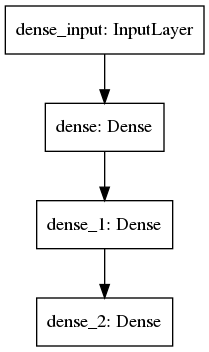

In [6]:
plot_model(model, to_file='Sequential_Model.png')
Image('Sequential_Model.png')

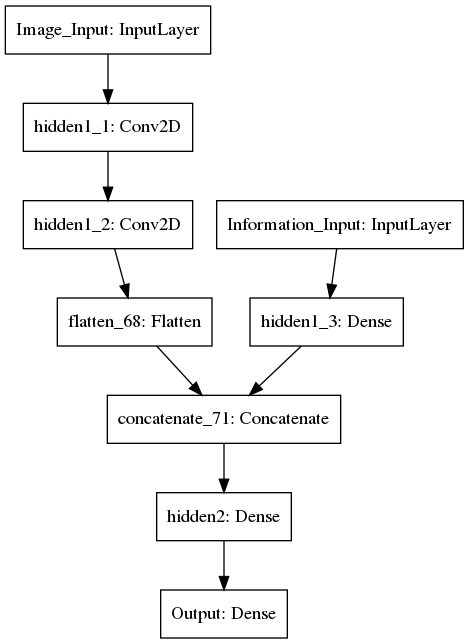

In [100]:
img_input = keras.Input(shape=(28, 28, 1), name='Image_Input')
hidden1_1 = layers.Conv2D(64, kernel_size=5, strides=2, activation='relu', name='hidden1_1')(img_input)
hidden1_2 = layers.Conv2D(32, kernel_size=5, strides=2, activation='relu', name='hidden1_2')(hidden1_1)
hidden1_2_ft= layers.Flatten()(hidden1_2)

info_input = keras.Input(shape=(1, ), name='Information_Input')
hidden1_3 = layers.Dense(64, activation='relu', name='hidden1_3')(info_input)

concat = layers.Concatenate()([hidden1_2_ft, hidden1_3])
hidden2 = layers.Dense(64, activation='relu', name='hidden2')(concat)

outputs = layers.Dense(1, name='Output')(hidden2)

model = keras.Model(inputs=[img_input, info_input], outputs=outputs)
plot_model(model, to_file='Functional_API_Multi_Input_Model.png')
Image('Functional_API_Multi_Input_Model.png')

In [197]:
img_input = keras.Input(shape=(28, 28, 1), name='Image_Input')
hidden1_1 = layers.Conv2D(64, kernel_size=5, strides=2, activation='relu', name='hidden1_1')(img_input)
hidden1_2 = layers.Conv2D(32, kernel_size=5, strides=2, activation='relu', name='hidden1_2')(hidden1_1)
hidden1_2_ft= layers.Flatten()(hidden1_2)

info_input = keras.Input(shape=(30, 1, ), name='Information_Input')
hidden1_3 = layers.LSTM(64, activation='relu', name='hidden1_3')(info_input)

info_input1 = keras.Input(shape=(1, ), name='Informa_Input1')
hidden1_31 = layers.Dense(64, activation='relu', name='hidden1_31')(info_input1)

concat = layers.Concatenate()([hidden1_2_ft, hidden1_3, hidden1_31])
hidden2 = layers.Dense(64, activation='relu', name='hidden2')(concat)

outputs = layers.Dense(1, name='Output')(hidden2)

model = keras.Model(inputs=[img_input, info_input], outputs=outputs)
plot_model(model, to_file='Functional_API_Multi_Input_Model.png')
Image('Functional_API_Multi_Input_Model.png')
model.summary()

ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='Informa_Input1'), name='Informa_Input1', description="created by layer 'Informa_Input1'") at layer "hidden1_31". The following previous layers were accessed without issue: ['hidden1_1', 'hidden1_2', 'flatten_89', 'hidden1_3']

(None, 512)
(None, 64)
(None, 64)
(None, 64)
(None, 704)


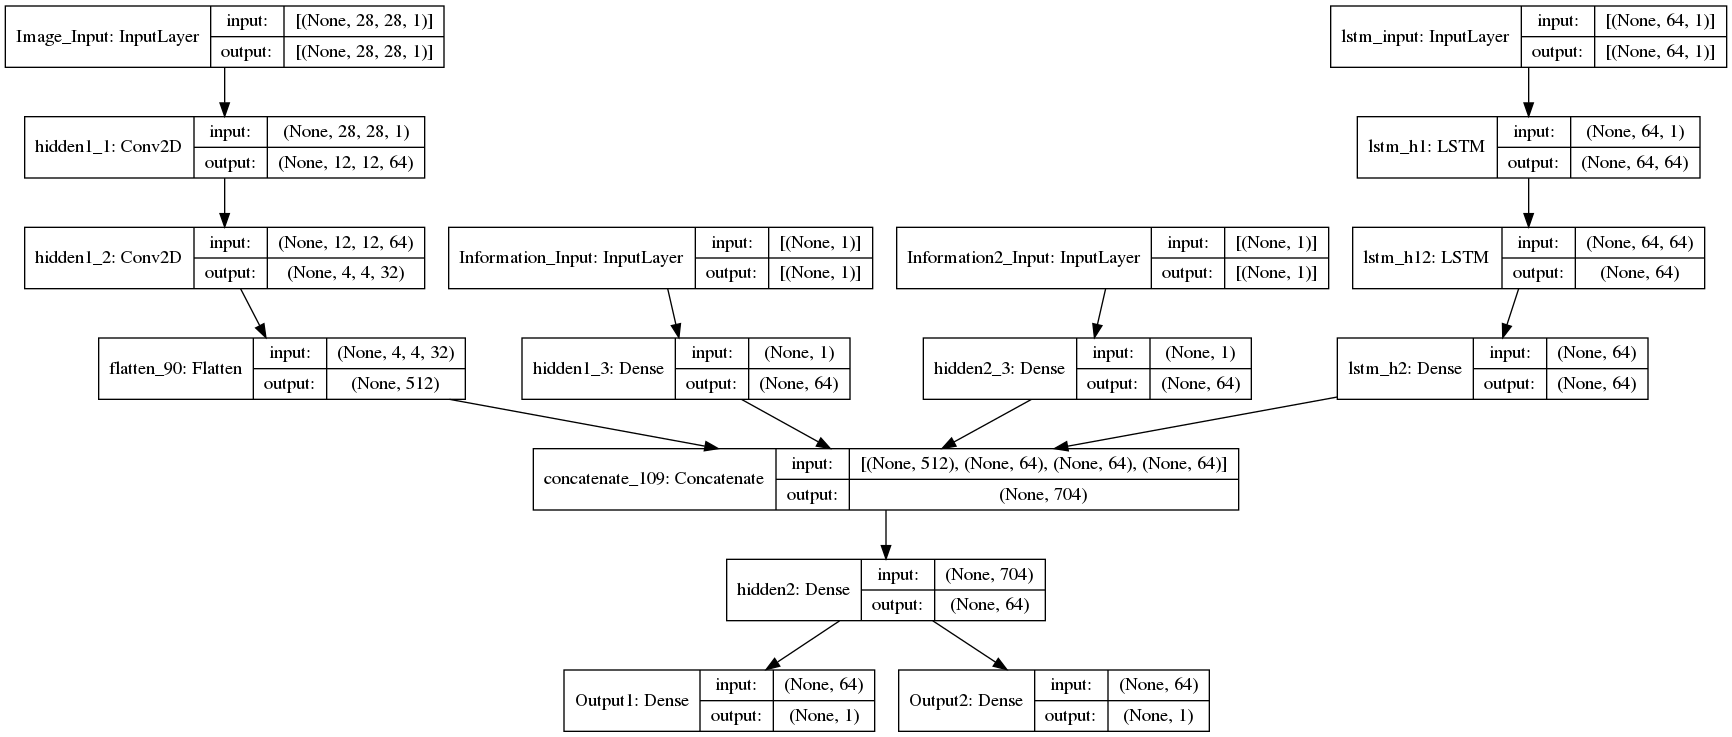

In [198]:
img_input = keras.Input(shape=(28, 28, 1), name='Image_Input')
hidden1_1 = layers.Conv2D(64, kernel_size=5, strides=2, activation='relu', name='hidden1_1')(img_input)
hidden1_2 = layers.Conv2D(32, kernel_size=5, strides=2, activation='relu', name='hidden1_2')(hidden1_1)
hidden1_2_ft = layers.Flatten()(hidden1_2)
print(hidden1_2_ft.shape)

info_input = keras.Input(shape=(1, ), name='Information_Input')
hidden1_3 = layers.Dense(64, activation='relu', name='hidden1_3')(info_input)
print(hidden1_3.shape)

info2_input = keras.Input(shape=(1, ), name='Information2_Input')
hidden2_3 = layers.Dense(64, activation='relu', name='hidden2_3')(info2_input)
print(hidden2_3.shape)

lstm_input = keras.Input(shape=(64, 1), name='lstm_input')
lstm_h1 = layers.LSTM(64, return_sequences=True, name='lstm_h1')(lstm_input)
lstm_h12 = layers.LSTM(64, name='lstm_h12')(lstm_h1)
lstm_h2 = layers.Dense(64, activation='relu', name='lstm_h2')(lstm_h12)
print(lstm_h2.shape)
# lstm_h3 = layers.Flatten(name="lstm_h3")(lstm_h12)

concat = layers.Concatenate(axis=1)([hidden1_2_ft, hidden1_3, hidden2_3, lstm_h2])
print(concat.shape)
hidden2 = layers.Dense(64, activation='relu', name='hidden2')(concat)

output1 = layers.Dense(1, name='Output1')(hidden2)
output2 = layers.Dense(1, name='Output2')(hidden2)

model = keras.Model(inputs=[img_input, info_input, info2_input, lstm_input], outputs=[output1, output2])

# 產生網絡拓撲圖
plot_model(model, show_shapes=True)

In [193]:
input_1 = keras.Input(shape=(600, 1), name='input_mar')
hidden_1 = layers.Conv1D(30, kernel_size=3, activation='relu', name='mouth_h1')(input_1)
hidden_1 = layers.LSTM(30, return_sequences=True, name='mouth_h1')(hidden_1)
output_1 = layers.LSTM(30, return_sequences=True, name='mouth_h1')(hidden_1)

In [8]:
input_1 = keras.Input(shape=(600, 1), name='input_mar')
hidden_1 = layers.Conv1D(80, kernel_size=1, padding='same', activation='relu')(input_1)
hidden_1 = layers.MaxPooling1D(pool_size=2, padding='valid')(hidden_1)
hidden_1 = layers.Conv1D(48, kernel_size=1, padding='same', activation='relu')(hidden_1)
hidden_1 = layers.MaxPooling1D(pool_size=2, padding='valid')(hidden_1)
hidden_1 = layers.LSTM(32, return_sequences=True)(hidden_1)
hidden_1 = layers.LSTM(16)(hidden_1)
hidden_1 = layers.Dense(30, activation="relu")(hidden_1)

In [15]:
input_2 = keras.Input(shape=(600, 1), name='input_blink_rate')
hidden_2 = layers.LSTM(32, return_sequences=True, name='eye_h1')(input_2)
hidden_2 = layers.LSTM(16)(hidden_2)
hidden_2 = layers.Dense(30, activation="relu")(hidden_2)

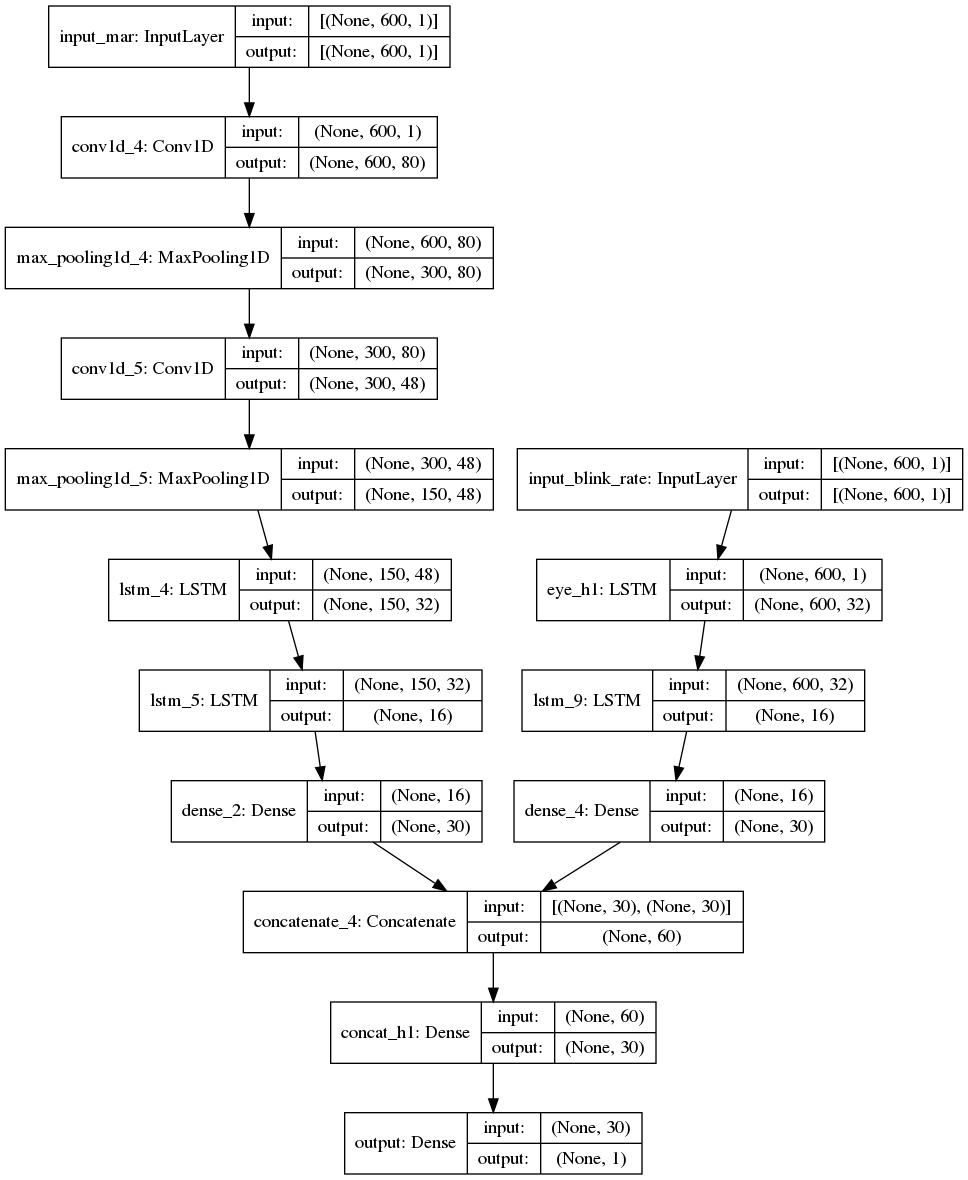

In [16]:
concat = layers.Concatenate(axis=-1)([hidden_1, hidden_2])
concat_h1 = layers.Dense(30, activation='relu', name='concat_h1')(concat)
output = layers.Dense(1, name='output')(concat_h1)

model = keras.Model(inputs=[input_1, input_2], outputs=[output])
plot_model(model, show_shapes=True)

In [1]:
model.summary()

NameError: name 'model' is not defined

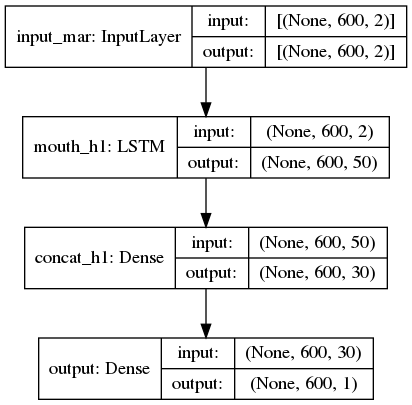

In [189]:
input_mar = keras.Input(shape=(600, 2), name='input_mar')
mar_h1 = layers.LSTM(50, return_sequences=True, name='mouth_h1')(input_mar)
concat_h1 = layers.Dense(30, activation='relu', name='concat_h1')(mar_h1)
output = layers.Dense(1, name='output')(concat_h1)

model = keras.Model(inputs=[input_mar], outputs=[output])
plot_model(model, show_shapes=True)

In [190]:
model.summary()

Model: "model_101"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_mar (InputLayer)       [(None, 600, 2)]          0         
_________________________________________________________________
mouth_h1 (LSTM)              (None, 600, 50)           10600     
_________________________________________________________________
concat_h1 (Dense)            (None, 600, 30)           1530      
_________________________________________________________________
output (Dense)               (None, 600, 1)            31        
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


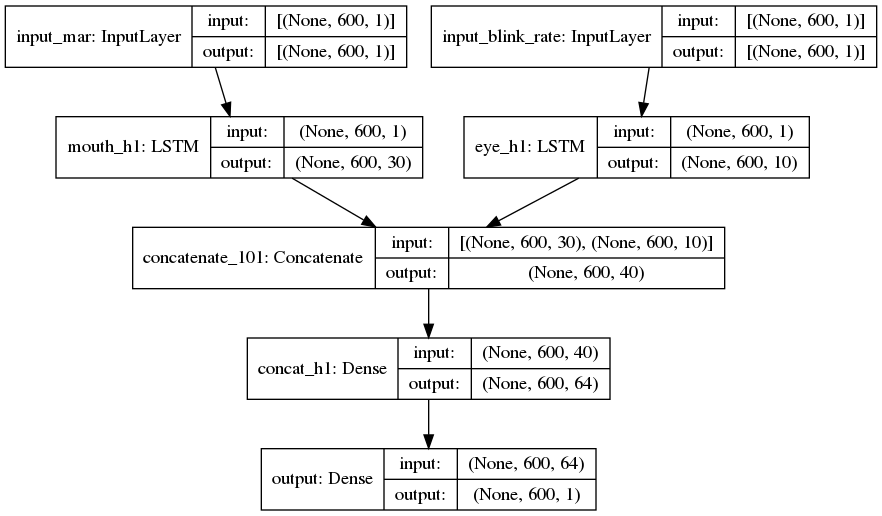

In [170]:
plot_model(model, show_shapes=True)